# My computing environment:

Operating system: Windows 11

IDE:Jupyter-lab

Language: Python

# Part 1

## Question: A description and analysis of your algorithms for generating the conflict graphs

##### My code:

In [1]:
import random
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertex_number):
        self._vertex_number = vertex_number
        self._graph = {}
        for vertex in range(0, vertex_number):
            self._graph[vertex] = []

    def add_edge(self, start_node, add_note):
        if add_note in self._graph[start_node]:
            return False
        elif start_node != add_note:
            self._graph[start_node].append(add_note)
            self._graph[add_note].append(start_node)
            return True
        else:
            return False

    def print_graph_list(self):
        for start_node in range(0, self._vertex_number):
            print(f"start note:{start_node}", end="")
            for add_note in self._graph[start_node]:
                print(f"-->{add_note}", end="")
            print("\n")
    
    def histograms_list(self):
        conflict_list = []
        for start_node in range(0, self._vertex_number):
            for add_note in self._graph[start_node]:
                conflict_list.append(start_node)
        return conflict_list


class CreateGraph:
    def __init__(self, vertex_number, E=None, DIST=None):
        """
        create graph, including Complete, Cycle, Uniform, Skewed, Gaussian distribution
        :param vertex_number: Number of vertices
        :param E: Number of conflicts between pairs of vertices for random graphs
        :param DIST: "Uniform", "Skewed", or "Gaussian"
        """
        self._vertex_number = vertex_number
        self._E = E
        self._DIST = DIST

    def create_graph_complete(self):
        """
        create complete graph
        :return: complete graph
        """
        new_graph_complete = Graph(self._vertex_number)
        for start_node in range(0, self._vertex_number):
            for add_note in range((start_node + 1), self._vertex_number):
                new_graph_complete.add_edge(start_node, add_note)

        return new_graph_complete

    def create_graph_cycle(self):
        """
        create cycle graph
        :return: cycle graph
        """
        new_graph_cycle = Graph(self._vertex_number)
        for start_node in range(0, (self._vertex_number - 1)):
            new_graph_cycle.add_edge(start_node, (start_node + 1))
        new_graph_cycle.add_edge((self._vertex_number - 1), 0)

        return new_graph_cycle

    def create_graph_random(self):
        """
        create random graph, including Uniform, Skewed, Gaussian distribution
        :return: random graph
        """
        # Gaussian distribution parameter
        arr = []
        for i in range(0, self._vertex_number):
            arr.append(i)
        # mean
        mu = np.mean(arr)
        # standard deviation
        sigma = np.std(arr)

        new_graph_random = Graph(self._vertex_number)
        start_node = None
        add_note = None

        min_E = 2000000
        if min_E > self._vertex_number * (self._vertex_number - 1) / 2:
            min_E = self._vertex_number * (self._vertex_number - 1) / 2

        if self._vertex_number < 10000 and self._E <= min_E:
            for i in range(self._E):
                success_symbol = False
                while success_symbol == False:
                    if self._DIST == "Uniform":
                        start_node = random.randint(0, (self._vertex_number - 1))
                        add_note = random.randint(0, (self._vertex_number - 1))
                    elif self._DIST == "Skewed":
                        start_node = int(random.triangular(0, self._vertex_number, 0))
                        add_note = int(random.triangular(0, self._vertex_number, 0))
                    elif self._DIST == "Gaussian":
                        start_node = int(abs(np.random.normal(loc=mu, scale=sigma, size=1)))
                        while start_node >= self._vertex_number:
                            start_node = int(abs(np.random.normal(loc=mu, scale=sigma, size=1)))
                        add_note = int(abs(np.random.normal(loc=mu, scale=sigma, size=1)))
                        while add_note >= self._vertex_number:
                            add_note = int(abs(np.random.normal(loc=mu, scale=sigma, size=1)))

                    if start_node != None and add_note != None:
                        success_symbol = new_graph_random.add_edge(start_node, add_note)

        return new_graph_random


class Chart():
    def __init__(self, x_axis, y_axis, range_list):
        self._x_axis = x_axis
        self._y_axis = y_axis
        self._range_list = range_list

    def graph_chart(self):
        x_axis = pd.Series(self._x_axis)
        y_axis = pd.Series(self._y_axis)
        pd.DataFrame(x_axis, y_axis)

        dataframe = pd.DataFrame({'vertex number': x_axis, 'time(ms)': y_axis})
        dataframe.to_csv('./Running_time.csv', index=False)

        plt.figure("Running Time vs Vertex Number")
        plt.plot(x_axis, y_axis, linewidth=1)

        ax = plt.gca()
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')

        x_tck = np.arange(self._range_list[0], self._range_list[1], self._range_list[2])
        plt.xticks(x_tck)

        plt.xlabel("Vertex Number")
        plt.ylabel("Time(ms)")
        plt.scatter(x_axis, y_axis, marker="s", s=40, facecolor="blue", zorder=3)
        plt.title("Running Time vs Vertex Number")

        plt.show()

##### Complete graph:

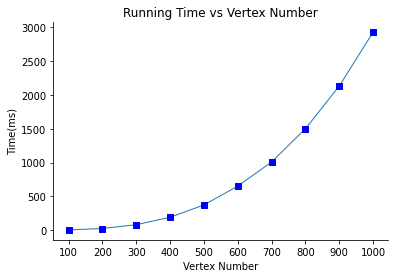

In [2]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [100, 10 * 100 + 1, 100]
    for i in range(range_list[0], range_list[1], range_list[2]):
        start_time = time.time()
        # complete graph
        complete_graph = CreateGraph(vertex_number=i)
        new_graph_complete = complete_graph.create_graph_complete()
        end_time = time.time() - start_time

        x.append(i)
        y.append(round((end_time * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

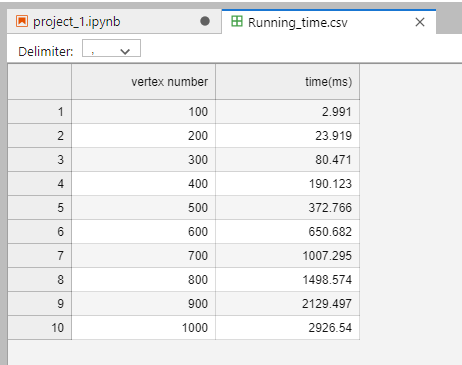

##### My description:

The time complexity f(n) is Θ (V^2). According to the graph and chart, They support my complexity analysis.

##### cycle graph:

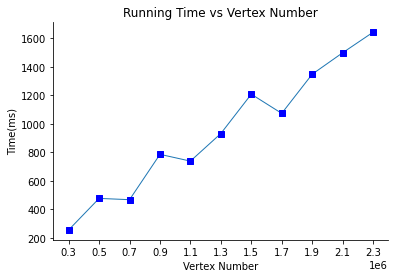

In [3]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [300000, 23 * 100000 + 1, 200000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        start_time = time.time()
        # cycle graph
        cycle_graph = CreateGraph(vertex_number=i)
        new_graph_cycle = cycle_graph.create_graph_cycle()
        end_time = time.time() - start_time

        x.append(i)
        y.append(round((end_time * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

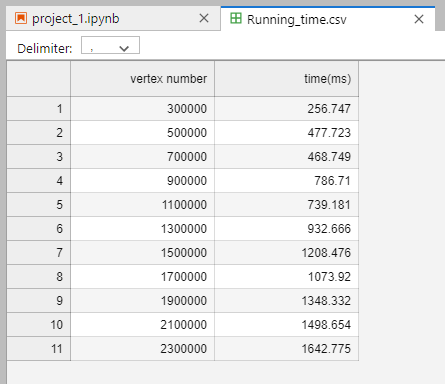

##### My description:

The time complexity f(n) is Θ (V). According to the graph and chart, They basically support my complexity analysis.

#### random graph:

In [4]:
class RandomChart():
    def __init__(self, vertex_list, edge_list, time_list, vertex_edge_list, range_list):
        self._V_number = vertex_list
        self._E_number = edge_list
        self._time = time_list
        self._vertex_edge_list = vertex_edge_list
        self._range_list = range_list

    def graph_chart(self):
        V_number = pd.Series(self._V_number)
        E_number = pd.Series(self._E_number)
        time_number = pd.Series(self._time)
        data = [V_number, E_number, time_number]
        pd.DataFrame(data)

        dataframe = pd.DataFrame({'vertex number': V_number, 'edge number': E_number, 'time(ms)': time_number})
        dataframe.to_csv('./Running_time.csv', index=False)

        x_axis = self._vertex_edge_list
        y_axis = self._time
        
        plt.figure("Running Time vs (Vertex + Edge) Number")
        plt.plot(x_axis, y_axis, linewidth=1)

        ax = plt.gca()
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')

        x_tck = np.arange(self._range_list[0], self._range_list[1], self._range_list[2])
        plt.xticks(x_tck)

        plt.xlabel("(Vertex + Edge) Number")
        plt.ylabel("Time(ms)")
        plt.scatter(x_axis, y_axis, marker="s", s=40, facecolor="blue", zorder=3)
        plt.title("Running Time vs (Vertex + Edge) Number")

        plt.show()

#### random graph (Uniform):

The vertex number increases. And The edge number does not increase:

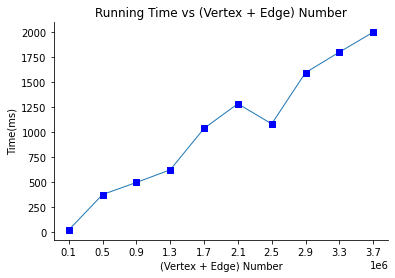

In [5]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [100000, 39 * 100000 + 1, 400000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 0
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=i, E=temp, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(i)
        edge_list.append(temp)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

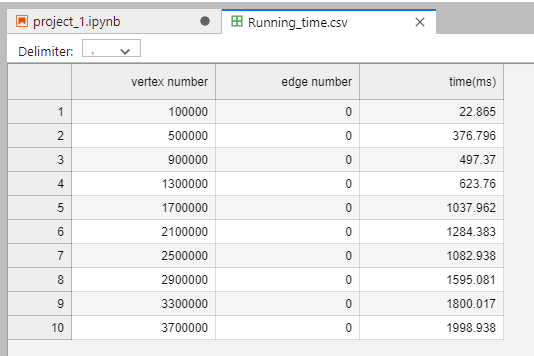

The vertex number does not increase. And The edge number increases:

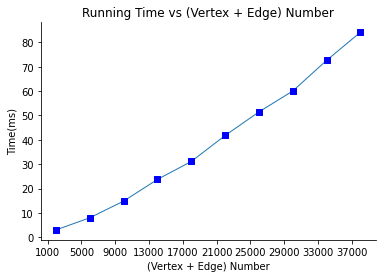

In [7]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [1000, 39 * 1000 + 1, 4000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=temp, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(temp)
        edge_list.append(i)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

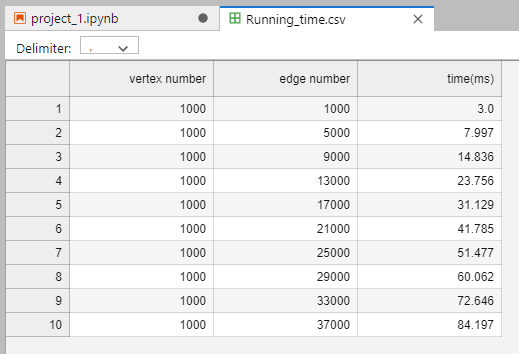

The vertex number increases. And The edge number increases:

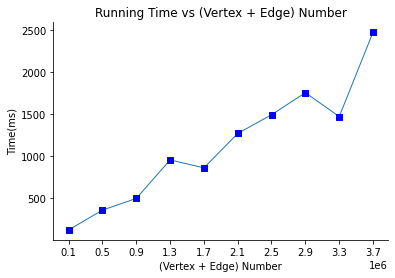

In [12]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [100000, 40 * 100000 + 1, 400000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(i)
        edge_list.append(i)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

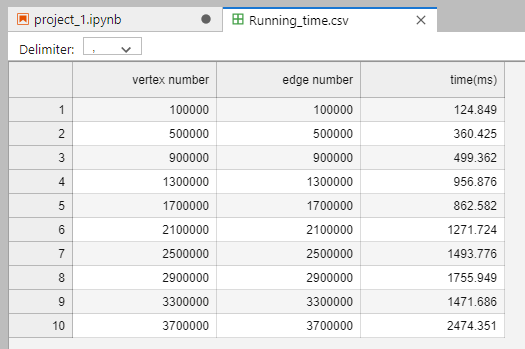

##### My description:

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Uniform distribution.

#### random graph (Skewed):

The vertex number increases. And The edge number does not increase:

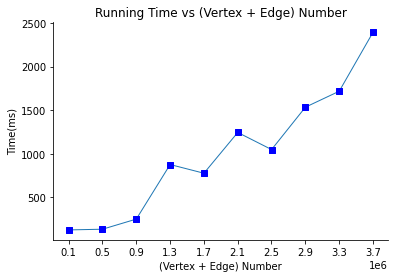

In [13]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [100000, 39 * 100000 + 1, 400000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=i, E=temp, DIST="Skewed")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(i)
        edge_list.append(temp)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

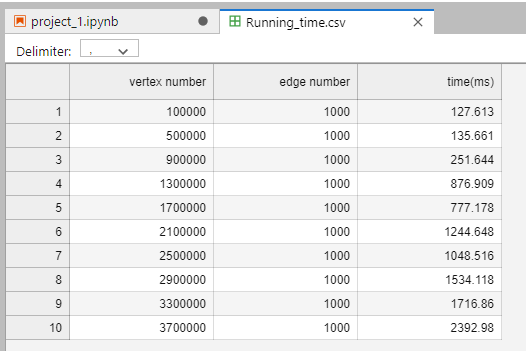

The vertex number does not increase. And The edge number increases:

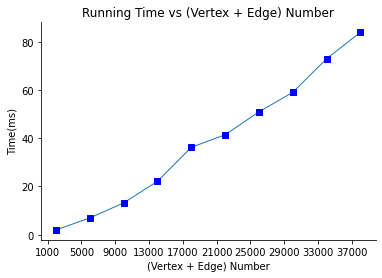

In [15]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [1000, 40 * 1000 + 1, 4000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=temp, E=i, DIST="Skewed")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(temp)
        edge_list.append(i)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

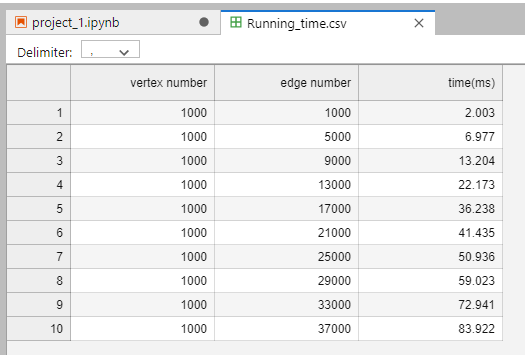

The vertex number increases. And The edge number increases:

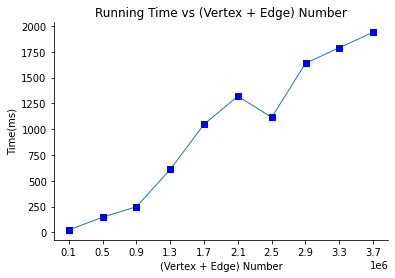

In [16]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [100000, 40 * 100000 + 1, 400000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Skewed")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(i)
        edge_list.append(i)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

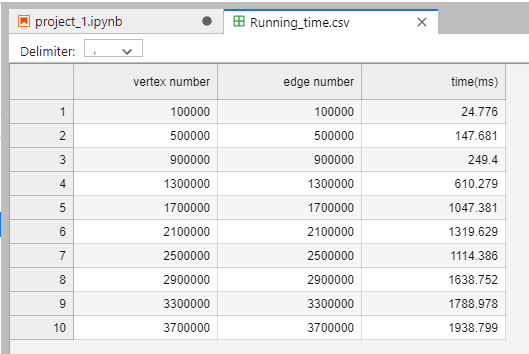

##### My description:

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

#### random graph (Gaussian):

The vertex number increases. And The edge number does not increase:

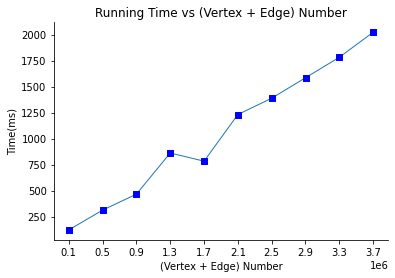

In [17]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [100000, 40 * 100000 + 1, 400000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=i, E=temp, DIST="Gaussian")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(i)
        edge_list.append(temp)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

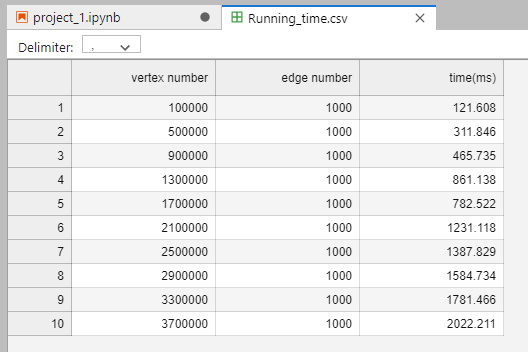

The vertex number does not increase. And The edge number increases:

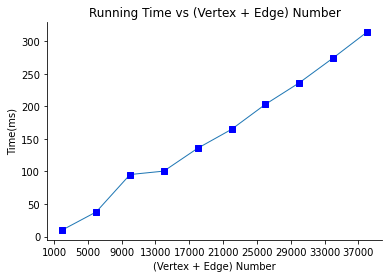

In [19]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [1000, 40 * 1000 + 1, 4000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=temp, E=i, DIST="Gaussian")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(temp)
        edge_list.append(i)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

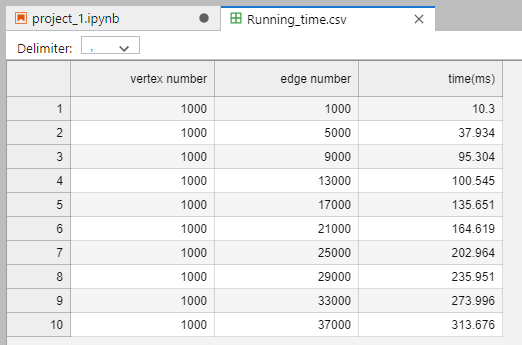

The vertex number increases. And The edge number increases:

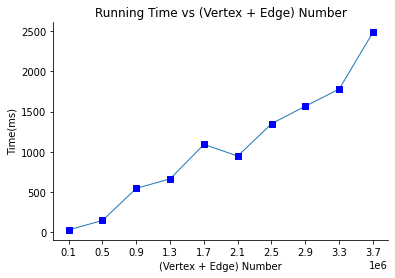

In [20]:
if __name__ == '__main__':
    vertex_list = []
    edge_list = []
    time_list = []
    vertex_edge_list = []
    range_list = [100000, 40 * 100000 + 1, 400000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        temp = 1000
        start_time = time.time()
        # random graph
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Gaussian")
        new_graph_random = random_graph.create_graph_random()
        end_time = time.time() - start_time

        vertex_list.append(i)
        edge_list.append(i)
        time_list.append(round((end_time * 1000),3))
        vertex_edge_list.append((i + temp))

    chart = RandomChart(vertex_list, edge_list, time_list, vertex_edge_list, range_list)
    chart.graph_chart()

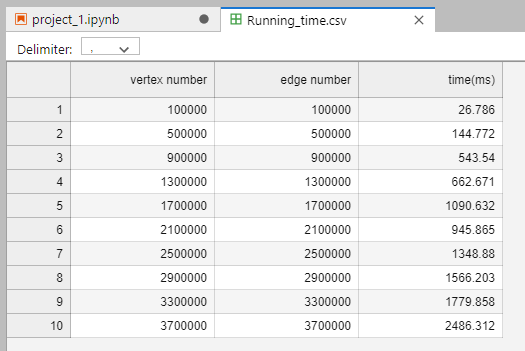

##### My description:

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Gaussian distribution.

### Histograms:

##### complete graph:

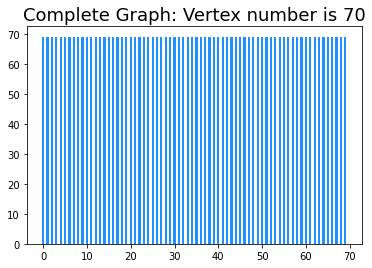

In [23]:
if __name__ == '__main__':
    # complete graph
    complete_graph = CreateGraph(vertex_number = 70)
    new_graph_complete = complete_graph.create_graph_complete()
    conflict_list = new_graph_complete.histograms_list()
    plt.figure("Complete Graph")
    plt.title("Complete Graph: Vertex number is 70", fontsize=18)
    plt.hist(x=conflict_list, bins=range(0,71), color='dodgerblue', histtype="bar", rwidth=0.5, align='left')
    plt.show()

##### cycle graph:

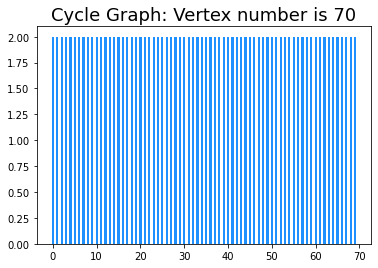

In [24]:
if __name__ == '__main__':
    # cycle graph
    cycle_graph = CreateGraph(vertex_number=70)
    new_graph_cycle = cycle_graph.create_graph_cycle()
    conflict_list = new_graph_cycle.histograms_list()
    plt.figure("Cycle Graph")
    plt.title("Cycle Graph: Vertex number is 70", fontsize=18)
    plt.hist(x=conflict_list, bins=range(0,71), color='dodgerblue', histtype="bar", rwidth=0.5, align='left')
    plt.show()

##### random graph with Uniform distribution:

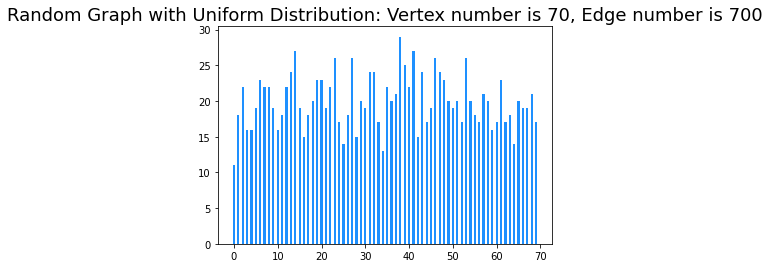

In [25]:
if __name__ == '__main__':
    # random graph with Uniform distribution
    random_graph = CreateGraph(vertex_number=70, E=700, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    conflict_list = new_graph_random.histograms_list()
    plt.figure("Random Graph with Uniform Distribution")
    plt.title("Random Graph with Uniform Distribution: Vertex number is 70, Edge number is 700", fontsize=18)
    plt.hist(x=conflict_list, bins=range(0,71), color='dodgerblue', histtype="bar", rwidth=0.5, align='left')
    plt.show()

##### random graph with Skewed distribution:

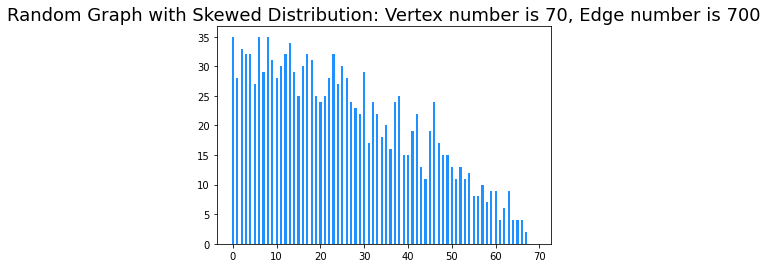

In [26]:
if __name__ == '__main__':
    # random graph with Skewed distribution
    random_graph = CreateGraph(vertex_number=70, E=700, DIST="Skewed")
    new_graph_random = random_graph.create_graph_random()
    conflict_list = new_graph_random.histograms_list()
    plt.figure("Random Graph with Skewed Distribution")
    plt.title("Random Graph with Skewed Distribution: Vertex number is 70, Edge number is 700", fontsize=18)
    plt.hist(x=conflict_list, bins=range(0,71), color='dodgerblue', histtype="bar", rwidth=0.5, align='left')
    plt.show()

##### random graph with Gaussian distribution:

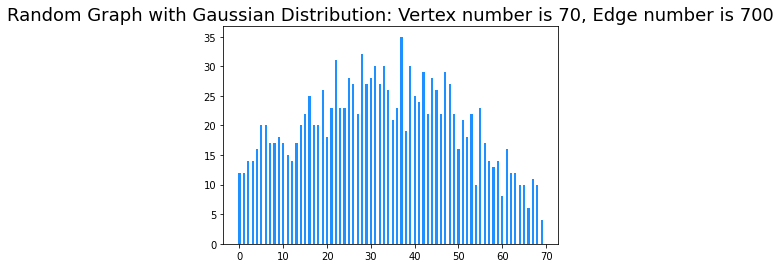

In [27]:
if __name__ == '__main__':
    # random graph with Gaussian distribution
    random_graph = CreateGraph(vertex_number=70, E=700, DIST="Gaussian")
    new_graph_random = random_graph.create_graph_random()
    conflict_list = new_graph_random.histograms_list()
    plt.figure("Random Graph with Gaussian Distribution")
    plt.title("Random Graph with Gaussian Distribution: Vertex number is 70, Edge number is 700", fontsize=18)
    plt.hist(x=conflict_list, bins=range(0,71), color='dodgerblue', histtype="bar", rwidth=0.5, align='left')
    plt.show()

# Part 2

## Vertex Ordering and Coloring:

### All Ordering and Coloring code (including Smallest Last Vertex Ordering, Smallest Original Degree Last, Uniform Random Ordering, BFS, DFS, and Greedy Search):

In [28]:
import time

class GraphOrderingColaringMethod:
    def __init__(self, graph):
        self._graph = graph
        self._vertex_number = self._graph._vertex_number
        self._deleted_vertex_list = [False] * self._vertex_number
        self._degree_graph = {}
        self._original_degree = [-1] * self._vertex_number
        self._current_degree = [-1] * self._vertex_number
        self._max_degree_number = 0
        self._pointer = [-1] * self._vertex_number

        for vertex in range(0, self._vertex_number):
            degree_number = len(self._graph._graph[vertex])
            self._original_degree[vertex] = degree_number
            self._current_degree[vertex] = degree_number

            if degree_number not in self._degree_graph:
                self._degree_graph[degree_number] = [vertex]
                self._pointer[vertex] = 0
            else:
                self._degree_graph[degree_number].append(vertex)
                self._pointer[vertex] = len(self._degree_graph[degree_number]) - 1

            if degree_number > self._max_degree_number:
                self._max_degree_number = degree_number

    def pop_vertex(self, deleted_vertex_ordering):
        degree_list = []
        for i in self._degree_graph.keys():
            degree_list.append(i)
        degree_list = [i for i in degree_list if len(self._degree_graph[i]) > 0]
        degree_list.sort()
        min_degree = degree_list[0]
        deleted_vertex = self._degree_graph[min_degree][-1]
        deleted_vertex_ordering.append(deleted_vertex)
        self._degree_graph[min_degree].pop()
        self._deleted_vertex_list[deleted_vertex] = True

        return min_degree, deleted_vertex

    def color_graph_all_vertexes(self, deleted_vertex_ordering):
        original_degrees = []
        for vertex in deleted_vertex_ordering:
            original_degrees.append(self._original_degree[vertex])
        average_degree = sum(self._original_degree) / self._vertex_number

        degree_colors = [-1] * self._vertex_number
        vertex_colors = [-1] * self._vertex_number
        degree_colors[0] = 0
        vertex_colors[deleted_vertex_ordering[0]] = 0
        total_number_colors = 1

        for vertex_index, vertex in enumerate(deleted_vertex_ordering[1:], 1):
            color_options = [False] * self._vertex_number
            for connected_vertex in self._graph._graph[vertex]:
                if vertex_colors[connected_vertex] != -1:
                    color_options[vertex_colors[connected_vertex]] = True
            color = 0
            while color < self._vertex_number:
                if color_options[color] == False:
                    break
                color += 1
            vertex_colors[vertex] = degree_colors[vertex_index] = color
            if color == total_number_colors:
                total_number_colors += 1

        return (degree_colors, vertex_colors, original_degrees, average_degree, total_number_colors)

    def smallest_last_vertex_ordering(self):
        deleted_degree_list = []
        deleted_vertex_ordering = []

        time_1 = time.time()
        while len(deleted_vertex_ordering) < self._vertex_number:
            min_degree, deleted_vertex = self.pop_vertex(deleted_vertex_ordering)
            deleted_degree_list.append(min_degree)

            for connected_vertex in self._graph._graph[deleted_vertex]:
                if self._deleted_vertex_list[connected_vertex] is False:
                    connected_vertex_position = [self._current_degree[connected_vertex],
                                                 self._pointer[connected_vertex]]
                    if connected_vertex_position[1] != len(self._degree_graph[connected_vertex_position[0]]) - 1:
                        self._degree_graph[connected_vertex_position[0]][connected_vertex_position[1]] = \
                        self._degree_graph[connected_vertex_position[0]][-1]
                        self._pointer[self._degree_graph[connected_vertex_position[0]][-1]] = connected_vertex_position[
                            1]
                    self._degree_graph[connected_vertex_position[0]].pop()
                    self._current_degree[connected_vertex] -= 1

                    if self._current_degree[connected_vertex] not in self._degree_graph:
                        self._degree_graph[self._current_degree[connected_vertex]] = [connected_vertex]
                        self._pointer[connected_vertex] = 0
                    else:
                        self._degree_graph[self._current_degree[connected_vertex]].append(connected_vertex)
                        self._pointer[connected_vertex] = len(
                            self._degree_graph[self._current_degree[connected_vertex]]) - 1
        ordering_time = time.time() - time_1

        # color graph: smallest last vertex ordering
        time_2 = time.time()
        result = self.color_graph_all_vertexes(deleted_vertex_ordering)
        coloring_time = time.time() - time_2
        degree_colors = result[0]
        vertex_colors = result[1]
        original_degrees = result[2]
        average_degree = result[3]
        total_number_colors = result[4]

        max_deleted_degree = max(deleted_degree_list)
        terminal_size = 0
        for j in range((len(deleted_vertex_ordering) - 1), -1, -1):
            if deleted_degree_list[j] == terminal_size:
                terminal_size += 1
            else:
                break

        return (degree_colors, vertex_colors, original_degrees, average_degree, deleted_degree_list, max_deleted_degree,
                terminal_size, total_number_colors, ordering_time, coloring_time, deleted_vertex_ordering)

    def smallest_original_degree_last(self):
        deleted_vertex_ordering = []
        
        time_1 = time.time()
        while len(deleted_vertex_ordering) < self._vertex_number:
            self.pop_vertex(deleted_vertex_ordering)
        ordering_time = time.time() - time_1

        # color graph: smallest original degree last
        time_2 = time.time()
        result = self.color_graph_all_vertexes(deleted_vertex_ordering)
        coloring_time = time.time() - time_2
        degree_colors = result[0]
        vertex_colors = result[1]
        original_degrees = result[2]
        average_degree = result[3]
        total_number_colors = result[4]

        return (degree_colors, vertex_colors, original_degrees, average_degree, total_number_colors, ordering_time, coloring_time)

    def uniform_random_ordering(self):
        deleted_vertex_ordering = []
        vertices_list = list(range(0, self._vertex_number))

        time_1 = time.time()
        while len(deleted_vertex_ordering) < self._vertex_number - 1:
            vertex = random.randint(0, len(vertices_list) - 1)
            deleted_vertex_ordering.append(vertices_list[vertex])
            vertices_list[vertex] = vertices_list[len(vertices_list) - 1]
            vertices_list.pop()
        deleted_vertex_ordering.append(vertices_list[0])
        ordering_time = time.time() - time_1

        # color graph: uniform random ordering
        time_2 = time.time()
        result = self.color_graph_all_vertexes(deleted_vertex_ordering)
        coloring_time = time.time() - time_2
        degree_colors = result[0]
        vertex_colors = result[1]
        original_degrees = result[2]
        average_degree = result[3]
        total_number_colors = result[4]

        return (degree_colors, vertex_colors, original_degrees, average_degree, total_number_colors, ordering_time, coloring_time)

    def BFS(self):
        deleted_vertex_ordering = []
        tree_list = [0]

        time_1 = time.time()
        while tree_list:
            vertex = tree_list.pop()
            if vertex not in deleted_vertex_ordering:
                deleted_vertex_ordering.append(vertex)
                tree_list = self._graph._graph[vertex] + tree_list
        ordering_time = time.time() - time_1

        # color graph: BFS
        time_2 = time.time()
        result = self.color_graph_all_vertexes(deleted_vertex_ordering)
        coloring_time = time.time() - time_2
        degree_colors = result[0]
        vertex_colors = result[1]
        original_degrees = result[2]
        average_degree = result[3]
        total_number_colors = result[4]

        return (degree_colors, vertex_colors, original_degrees, average_degree, total_number_colors, ordering_time, coloring_time)

    def DFS(self):
        deleted_vertex_ordering = []
        tree_list = [0]

        time_1 = time.time()
        while tree_list:
            vertex = tree_list.pop()
            if vertex not in deleted_vertex_ordering:
                deleted_vertex_ordering.append(vertex)
                tree_list = tree_list + self._graph._graph[vertex]
        ordering_time = time.time() - time_1

        # color graph: DFS
        time_2 = time.time()
        result = self.color_graph_all_vertexes(deleted_vertex_ordering)
        coloring_time = time.time() - time_2
        degree_colors = result[0]
        vertex_colors = result[1]
        original_degrees = result[2]
        average_degree = result[3]
        total_number_colors = result[4]

        return (degree_colors, vertex_colors, original_degrees, average_degree, total_number_colors, ordering_time, coloring_time)

    def greedy_search(self):
        deleted_vertex_ordering = []
        tree_list = [0]

        time_1 = time.time()
        while tree_list:
            vertex = tree_list.pop()
            if vertex not in deleted_vertex_ordering:
                deleted_vertex_ordering.append(vertex)
                temp_list = self._graph._graph[vertex]
                temp_node = None
                max_len = 0
                for i in temp_list:
                    if i in deleted_vertex_ordering:
                        pass
                    elif len(self._graph._graph[i]) > max_len:
                        max_len = len(self._graph._graph[i])
                        temp_node = i
                if temp_node != None:
                    tree_list = tree_list + self._graph._graph[vertex] + [temp_node]
        ordering_time = time.time() - time_1

        # color graph: greedy search
        time_2 = time.time()
        result = self.color_graph_all_vertexes(deleted_vertex_ordering)
        coloring_time = time.time() - time_2
        degree_colors = result[0]
        vertex_colors = result[1]
        original_degrees = result[2]
        average_degree = result[3]
        total_number_colors = result[4]

        return (degree_colors, vertex_colors, original_degrees, average_degree, total_number_colors, ordering_time, coloring_time)

### Smallest Last Vertex Ordering:

Step 1. Create a degree graph based on the number of conflicts each vertex has in the graph. Key is the number of conflicts, and value is the list of vertices that currently have that number of conflicts.

Step 2. Take the rightmost value in the list with the smallest key from the degree graph and subtract 1 from the conflict value of that value, and put that vertex into the deleted_vertex_ordering list, which is the order of ordering. If the conflict value after subtracting 1 is 0, the vertex is not reinserted into the degree graph; if the conflict value after subtracting 1 is not 0, the vertex is inserted into the corresponding position in the degree graph according to the new conflict value.

Step 3. Subtract the conflicting values of the vertices that conflict with the values in Step 2 by one. And replace their conflicting values in the degree graph. That is, they are replaced from the list of values corresponding to the original key to the list of values corresponding to the new key.

Step 4. If there is still data in the degree graph, skip to Step 2. If there is no more data in the degree graph, skip to Step 5.

Step 5. The order of the data in the deleted_vertex_ordering list is the order of ordering.

### Smallest Last Vertex Ordering Coloring:

Step 1. Compute the corresponding degrees for each vertex from the deleted_vertex_ordering list and fill the values into the original_degrees list. Set all the values in the color_options list to False, where the number of False is the number of vertices.

Step 2. Set the color of the first vertex in the deleted_vertex_ordering list to 0. Fill the color value into the position of the vertex in the vertex_colors list.

Step 3. Take the next vertex in the deleted_vertex_ordering list and its corresponding index value in the deleted_vertex_ordering.

Step 4. Detects all vertices that have conflicts with this vertex. If the conflicting vertex already has a color set, set the color as the index value to True for the position corresponding to that index in the color_options list.

Step 5. Detects the index with the earliest False value from the color_options list, and that index value is the value of the vertex color. And fill the color value into the vertex_colors list corresponding to the position of the vertex.

Step 6. If the value in the deleted_vertex_ordering list is not read out, skip to Step 3. If the value in the deleted_vertex_ordering list is read out, skip to Step 7.

Step 7. Each index value and the data value in the vertex_colors list corresponds to the vertex value and the color value of the vertex, respectively.

### Smallest Last Vertex Ordering and Coloring Code:

#### Complete graph:

##### Ordering time:

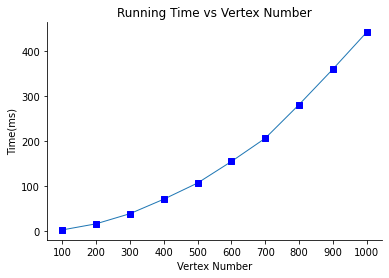

In [29]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [100, 10 * 100 + 1, 100]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # complete graph:
        complete_graph = CreateGraph(vertex_number=i)
        new_graph_complete = complete_graph.create_graph_complete()

        # SLVO complete graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_complete)

        # SLVO complete graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[8] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

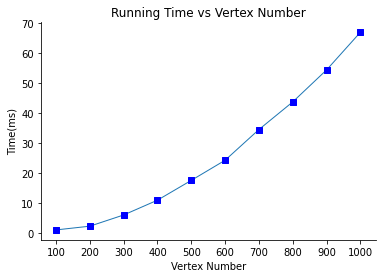

In [30]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [100, 10 * 100 + 1, 100]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # complete graph:
        complete_graph = CreateGraph(vertex_number=i)
        new_graph_complete = complete_graph.create_graph_complete()

        # SLVO complete graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_complete)

        # SLVO complete graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[9] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [31]:
if __name__ == '__main__':
    # complete graph:
    complete_graph = CreateGraph(vertex_number=10)
    new_graph_complete = complete_graph.create_graph_complete()
    new_graph_complete.print_graph_list()
    
    # SLVO complete graph:
    SLVO_object = GraphOrderingColaringMethod(new_graph_complete)
    
    # SLVO complete graph result:
    result = SLVO_object.smallest_last_vertex_ordering()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[7]}\n")

start note:0-->1-->2-->3-->4-->5-->6-->7-->8-->9

start note:1-->0-->2-->3-->4-->5-->6-->7-->8-->9

start note:2-->0-->1-->3-->4-->5-->6-->7-->8-->9

start note:3-->0-->1-->2-->4-->5-->6-->7-->8-->9

start note:4-->0-->1-->2-->3-->5-->6-->7-->8-->9

start note:5-->0-->1-->2-->3-->4-->6-->7-->8-->9

start note:6-->0-->1-->2-->3-->4-->5-->7-->8-->9

start note:7-->0-->1-->2-->3-->4-->5-->6-->8-->9

start note:8-->0-->1-->2-->3-->4-->5-->6-->7-->9

start note:9-->0-->1-->2-->3-->4-->5-->6-->7-->8

-----------------------------------------------
vertex colors: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

original degrees: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

total number colors: 10



#### Cycle graph:

##### Ordering time:

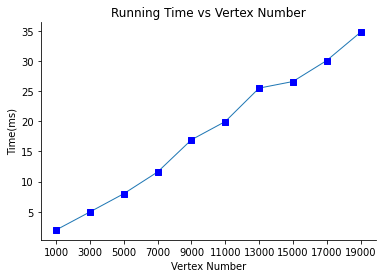

In [32]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 20 * 1000 + 1, 2000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # cycle graph:
        cycle_graph = CreateGraph(vertex_number=i)
        new_graph_cycle = cycle_graph.create_graph_cycle()

        # SLVO cycle graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_cycle)

        # SLVO cycle graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[8] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

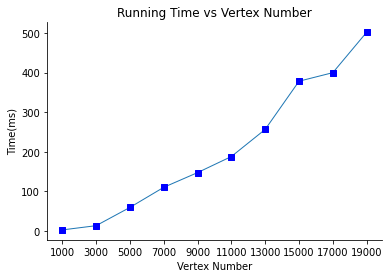

In [33]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 20 * 1000 + 1, 2000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # cycle graph:
        cycle_graph = CreateGraph(vertex_number=i)
        new_graph_cycle = cycle_graph.create_graph_cycle()

        # SLVO cycle graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_cycle)

        # SLVO cycle graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[9] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [34]:
if __name__ == '__main__':
    # cycle graph:
    cycle_graph = CreateGraph(vertex_number=10)
    new_graph_cycle = cycle_graph.create_graph_cycle()
    new_graph_cycle.print_graph_list()
    
    # SLVO cycle graph:
    SLVO_object = GraphOrderingColaringMethod(new_graph_cycle)
    
    # SLVO cycle graph result:
    result = SLVO_object.smallest_last_vertex_ordering()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[7]}\n")

start note:0-->1-->9

start note:1-->0-->2

start note:2-->1-->3

start note:3-->2-->4

start note:4-->3-->5

start note:5-->4-->6

start note:6-->5-->7

start note:7-->6-->8

start note:8-->7-->9

start note:9-->8-->0

-----------------------------------------------
vertex colors: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

original degrees: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

total number colors: 2



#### Random graph with Uniform distribution:

##### Ordering time:

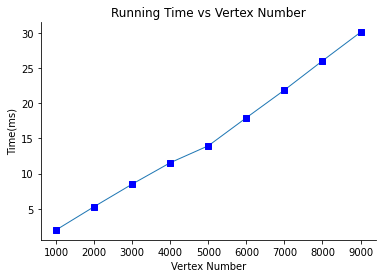

In [35]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph with Uniform distribution:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # SLVO random graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_random)

        # SLVO random graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[8] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

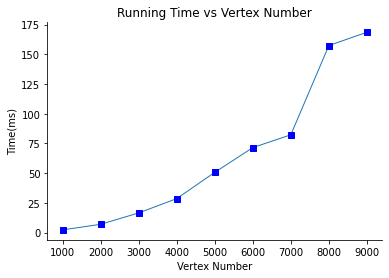

In [36]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph with Uniform distribution:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # SLVO random graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_random)

        # SLVO random graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[9] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [37]:
if __name__ == '__main__':
    # random graph with Uniform distribution:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()
    
    # SLVO random graph:
    SLVO_object = GraphOrderingColaringMethod(new_graph_random)
    
    # SLVO random graph result:
    result = SLVO_object.smallest_last_vertex_ordering()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[7]}\n")

start note:0-->5-->3-->1-->8-->4-->6

start note:1-->3-->2-->6-->0-->5-->7-->8

start note:2-->4-->9-->1-->3-->8-->6

start note:3-->4-->1-->2-->6-->0-->8-->9

start note:4-->3-->6-->2-->7-->5-->8-->0

start note:5-->0-->4-->1-->8-->7

start note:6-->4-->1-->8-->3-->0-->2

start note:7-->4-->9-->1-->5

start note:8-->6-->9-->2-->4-->3-->5-->0-->1

start note:9-->2-->8-->7-->3

-----------------------------------------------
vertex colors: [1, 2, 1, 4, 2, 0, 0, 1, 3, 0]

original degrees: [4, 4, 5, 7, 6, 6, 6, 8, 7, 7]

total number colors: 5



#### Random graph with Skewed distribution:

##### Ordering time:

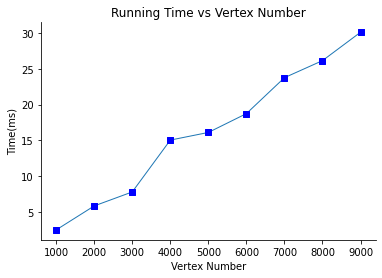

In [38]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph with Skewed distribution:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Skewed")
        new_graph_random = random_graph.create_graph_random()

        # SLVO random graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_random)

        # SLVO random graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[8] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

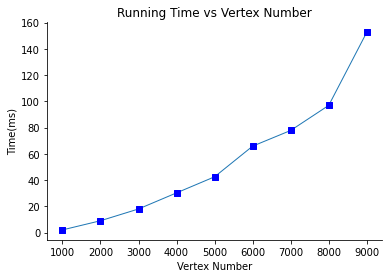

In [39]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph with Skewed distribution:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Skewed")
        new_graph_random = random_graph.create_graph_random()

        # SLVO random graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_random)

        # SLVO random graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[9] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [40]:
if __name__ == '__main__':
    # random graph with Skewed distribution:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Skewed")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()
    
    # SLVO random graph:
    SLVO_object = GraphOrderingColaringMethod(new_graph_random)
    
    # SLVO random graph result:
    result = SLVO_object.smallest_last_vertex_ordering()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[7]}\n")

start note:0-->3-->7-->1-->4-->2-->8-->6-->5

start note:1-->5-->4-->0-->9-->7-->6-->3-->8-->2

start note:2-->4-->0-->3-->6-->7-->5-->1

start note:3-->6-->0-->7-->4-->1-->2-->5

start note:4-->1-->3-->2-->0-->6-->5

start note:5-->1-->4-->6-->3-->0-->2

start note:6-->3-->1-->4-->8-->7-->5-->2-->0

start note:7-->0-->3-->1-->6-->2

start note:8-->6-->0-->1

start note:9-->1

-----------------------------------------------
vertex colors: [4, 2, 1, 3, 6, 0, 5, 0, 0, 0]

original degrees: [1, 3, 5, 7, 9, 7, 6, 8, 8, 6]

total number colors: 7



#### Random graph with Gaussian distribution:

##### Ordering time:

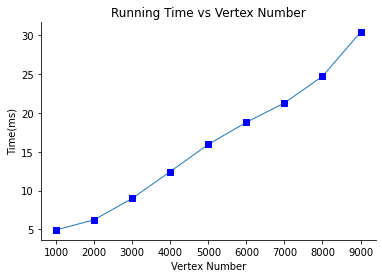

In [42]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph with Skewed distribution:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Gaussian")
        new_graph_random = random_graph.create_graph_random()

        # SLVO random graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_random)

        # SLVO random graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[8] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

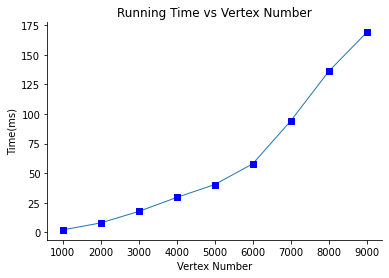

In [43]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph with Skewed distribution:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Gaussian")
        new_graph_random = random_graph.create_graph_random()

        # SLVO random graph:
        SLVO_object = GraphOrderingColaringMethod(new_graph_random)

        # SLVO random graph result:
        result = SLVO_object.smallest_last_vertex_ordering()

        x.append(i)
        y.append(round((result[9] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [44]:
if __name__ == '__main__':
    # random graph with Skewed distribution:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Gaussian")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()
    
    # SLVO random graph:
    SLVO_object = GraphOrderingColaringMethod(new_graph_random)
    
    # SLVO random graph result:
    result = SLVO_object.smallest_last_vertex_ordering()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[7]}\n")

start note:0-->1-->2-->5-->7-->4

start note:1-->0-->6-->5-->4-->8-->3

start note:2-->0-->6-->7-->5-->3-->4-->8

start note:3-->7-->4-->6-->2-->8-->5-->1

start note:4-->7-->6-->3-->1-->5-->8-->2-->9-->0

start note:5-->7-->6-->1-->2-->4-->3-->0

start note:6-->7-->1-->2-->5-->4-->3

start note:7-->6-->5-->4-->3-->2-->0-->9

start note:8-->1-->3-->4-->2

start note:9-->7-->4

-----------------------------------------------
vertex colors: [0, 1, 1, 3, 2, 4, 0, 5, 0, 0]

original degrees: [2, 4, 6, 5, 9, 7, 7, 7, 6, 7]

total number colors: 6



### Smallest Original Degree Last Ordering and Coloring Code:

#### Random graph with Uniform distribution:

##### Ordering time:

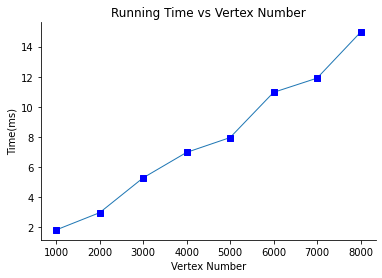

In [45]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 8 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # SODL random graph:
        SODL_object = GraphOrderingColaringMethod(new_graph_random)

        # SODL random graph result:
        result = SODL_object.smallest_original_degree_last()
        
        x.append(i)
        y.append(round((result[5] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

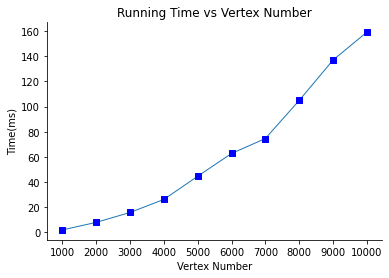

In [48]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 10 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # SODL random graph:
        SODL_object = GraphOrderingColaringMethod(new_graph_random)

        # SODL random graph result:
        result = SODL_object.smallest_original_degree_last()
        
        x.append(i)
        y.append(round((result[6] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [49]:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()
    
    # SODL random graph:
    SODL_object = GraphOrderingColaringMethod(new_graph_random)
    
    # SODL random graph result:
    result = SODL_object.smallest_original_degree_last()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[4]}\n")

start note:0-->7-->5-->3-->4-->2-->9-->1

start note:1-->8-->4-->2-->7-->3-->5-->0

start note:2-->9-->6-->0-->1-->4-->8

start note:3-->0-->8-->7-->5-->1-->4-->9

start note:4-->0-->7-->9-->6-->1-->2-->3

start note:5-->0-->3-->1-->6

start note:6-->2-->4-->9-->8-->5

start note:7-->0-->4-->3-->1-->8

start note:8-->9-->3-->1-->6-->7-->2

start note:9-->8-->2-->4-->0-->6-->3

-----------------------------------------------
vertex colors: [5, 4, 3, 1, 2, 0, 1, 0, 2, 0]

original degrees: [4, 5, 5, 6, 6, 6, 7, 7, 7, 7]

total number colors: 6



### Uniform random ordering:

Step 1. Initialize a list of vertices_list. The values in the list are from 0 to (number of vertices - 1). These numbers are the values of each vertex. Initialize a deleted_vertex_ordering list.

Step 2. Select a random number from the vertices_list list and use that number as the index value of the vertices_list to find the corresponding value. Insert the value into the deleted_vertex_ordering list.

Step 3. Replace the value corresponding to the value just indexed in the vertices_list list with the value of the last one in the vertices_list list. And pop the last value in the vertices_list list.

Step 4. If there are at least two values left in the vertices_list list, skip to Step 2. If there is only one value left in the vertices_list list, skip to Step 5.

Step 5. Insert the unique value from the vertices_list list into the deleted_vertex_ordering list. The order of the data in the deleted_vertex_ordering list is the order of ordering.

### Uniform random coloring:

Step 1. Compute the corresponding degrees for each vertex from the deleted_vertex_ordering list and fill the values into the original_degrees list. Set all the values in the color_options list to False, where the number of False is the number of vertices.

Step 2. Set the color of the first vertex in the deleted_vertex_ordering list to 0. Fill the color value into the position of the vertex in the vertex_colors list.

Step 3. Take the next vertex in the deleted_vertex_ordering list and its corresponding index value in the deleted_vertex_ordering.

Step 4. Detects all vertices that have conflicts with this vertex. If the conflicting vertex already has a color set, set the color as the index value to True for the position corresponding to that index in the color_options list.

Step 5. Detects the index with the earliest False value from the color_options list, and that index value is the value of the vertex color. And fill the color value into the vertex_colors list corresponding to the position of the vertex.

Step 6. If the value in the deleted_vertex_ordering list is not read out, skip to Step 3. If the value in the deleted_vertex_ordering list is read out, skip to Step 7.

Step 7. Each index value and the data value in the vertex_colors list corresponds to the vertex value and the color value of the vertex, respectively.

### Uniform random Ordering and Coloring Code:

#### Random graph with Uniform distribution:

##### Ordering time:

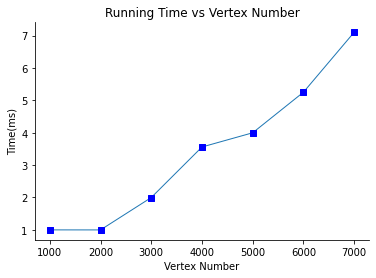

In [51]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 7 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # Uniform random random graph:
        Uniform_random_object = GraphOrderingColaringMethod(new_graph_random)

        # Uniform random random graph result:
        result = Uniform_random_object.uniform_random_ordering()
        
        x.append(i)
        y.append(round((result[5] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V+E). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

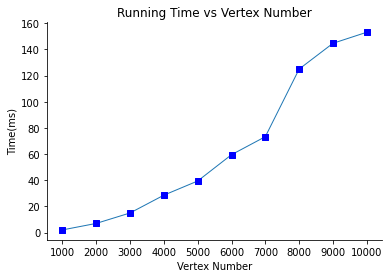

In [52]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 10 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # Uniform random random graph:
        Uniform_random_object = GraphOrderingColaringMethod(new_graph_random)

        # Uniform random random graph result:
        result = Uniform_random_object.uniform_random_ordering()
        
        x.append(i)
        y.append(round((result[6] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [53]:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()
    
    # Uniform random random graph:
    Uniform_random_object = GraphOrderingColaringMethod(new_graph_random)
    
    # Uniform random random graph result:
    result = Uniform_random_object.uniform_random_ordering()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[4]}\n")

start note:0-->2-->6-->7-->9

start note:1-->4-->3-->5-->2

start note:2-->0-->7-->6-->8-->5-->9-->4-->3-->1

start note:3-->8-->9-->1-->5-->4-->2-->7-->6

start note:4-->6-->1-->3-->8-->2

start note:5-->9-->3-->2-->1-->7-->6

start note:6-->4-->0-->2-->9-->5-->3

start note:7-->9-->0-->2-->8-->5-->3

start note:8-->3-->2-->4-->7-->9

start note:9-->7-->3-->5-->0-->2-->6-->8

-----------------------------------------------
vertex colors: [2, 1, 0, 2, 3, 4, 1, 5, 1, 3]

original degrees: [9, 4, 8, 5, 5, 6, 7, 6, 4, 6]

total number colors: 6



### BFS ordering:

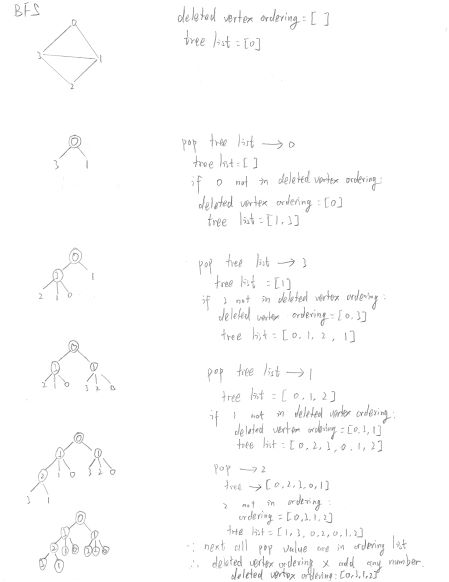

### BFS coloring:

Step 1. Compute the corresponding degrees for each vertex from the deleted_vertex_ordering list and fill the values into the original_degrees list. Set all the values in the color_options list to False, where the number of False is the number of vertices.

Step 2. Set the color of the first vertex in the deleted_vertex_ordering list to 0. Fill the color value into the position of the vertex in the vertex_colors list.

Step 3. Take the next vertex in the deleted_vertex_ordering list and its corresponding index value in the deleted_vertex_ordering.

Step 4. Detects all vertices that have conflicts with this vertex. If the conflicting vertex already has a color set, set the color as the index value to True for the position corresponding to that index in the color_options list.

Step 5. Detects the index with the earliest False value from the color_options list, and that index value is the value of the vertex color. And fill the color value into the vertex_colors list corresponding to the position of the vertex.

Step 6. If the value in the deleted_vertex_ordering list is not read out, skip to Step 3. If the value in the deleted_vertex_ordering list is read out, skip to Step 7.

Step 7. Each index value and the data value in the vertex_colors list corresponds to the vertex value and the color value of the vertex, respectively.

### BFS Ordering and Coloring Code:

#### Random graph with Uniform distribution:

##### Ordering time:

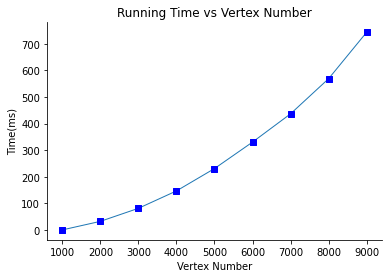

In [54]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # BFS random graph:
        BFS_object = GraphOrderingColaringMethod(new_graph_random)

        # SODL random graph result:
        result = BFS_object.BFS()
        
        x.append(i)
        y.append(round((result[5] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Ordering time:

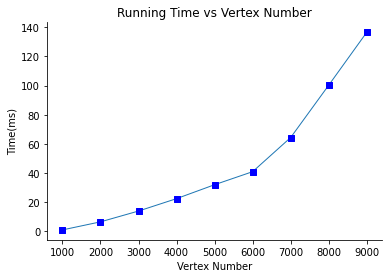

In [55]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # BFS random graph:
        BFS_object = GraphOrderingColaringMethod(new_graph_random)

        # SODL random graph result:
        result = BFS_object.BFS()
        
        x.append(i)
        y.append(round((result[6] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [56]:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()

    # BFS random graph:
    BFS_object = GraphOrderingColaringMethod(new_graph_random)

    # SODL random graph result:
    result = BFS_object.BFS()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[4]}\n")

start note:0-->5-->2-->9-->6-->7-->4

start note:1-->3-->9-->7-->4-->2-->5-->6

start note:2-->0-->7-->6-->9-->1-->5-->8

start note:3-->1-->8-->7-->9-->5

start note:4-->9-->1-->7-->0

start note:5-->9-->7-->0-->1-->2-->3

start note:6-->8-->2-->0-->7-->9-->1

start note:7-->1-->5-->2-->4-->6-->3-->0-->9

start note:8-->6-->3-->2

start note:9-->1-->4-->5-->0-->2-->6-->3-->7

-----------------------------------------------
vertex colors: [0, 0, 4, 4, 1, 1, 1, 2, 0, 3]

original degrees: [6, 4, 8, 6, 8, 7, 6, 7, 5, 3]

total number colors: 5



### DFS ordering:

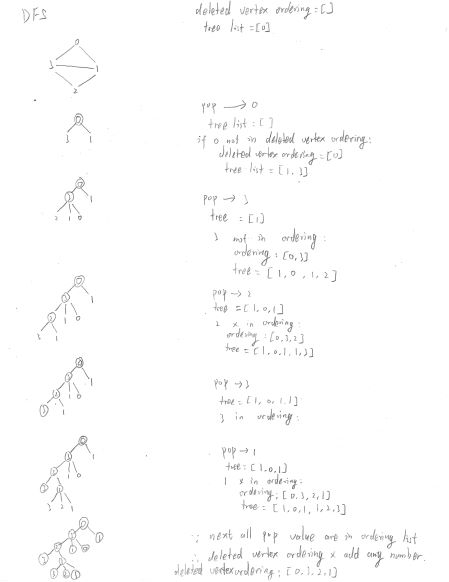

### DFS coloring:

Step 1. Compute the corresponding degrees for each vertex from the deleted_vertex_ordering list and fill the values into the original_degrees list. Set all the values in the color_options list to False, where the number of False is the number of vertices.

Step 2. Set the color of the first vertex in the deleted_vertex_ordering list to 0. Fill the color value into the position of the vertex in the vertex_colors list.

Step 3. Take the next vertex in the deleted_vertex_ordering list and its corresponding index value in the deleted_vertex_ordering.

Step 4. Detects all vertices that have conflicts with this vertex. If the conflicting vertex already has a color set, set the color as the index value to True for the position corresponding to that index in the color_options list.

Step 5. Detects the index with the earliest False value from the color_options list, and that index value is the value of the vertex color. And fill the color value into the vertex_colors list corresponding to the position of the vertex.

Step 6. If the value in the deleted_vertex_ordering list is not read out, skip to Step 3. If the value in the deleted_vertex_ordering list is read out, skip to Step 7.

Step 7. Each index value and the data value in the vertex_colors list corresponds to the vertex value and the color value of the vertex, respectively.

### DFS Ordering and Coloring Code:

#### Random graph with Uniform distribution:

##### Ordering time:

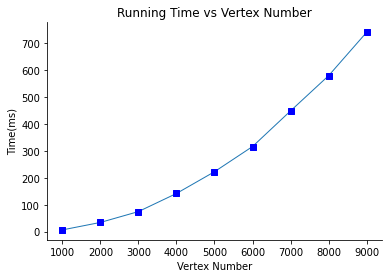

In [57]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # DFS random graph:
        DFS_object = GraphOrderingColaringMethod(new_graph_random)

        # SODL random graph result:
        result = DFS_object.DFS()
        
        x.append(i)
        y.append(round((result[5] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

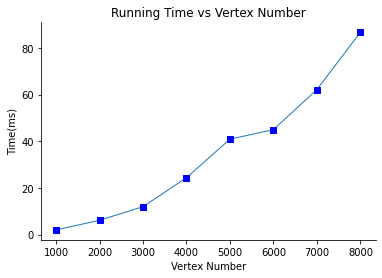

In [63]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 8 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # DFS random graph:
        DFS_object = GraphOrderingColaringMethod(new_graph_random)

        # SODL random graph result:
        result = DFS_object.DFS()
        
        x.append(i)
        y.append(round((result[6] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [64]:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()

    # DFS random graph:
    DFS_object = GraphOrderingColaringMethod(new_graph_random)

    # SODL random graph result:
    result = DFS_object.DFS()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[4]}\n")

start note:0-->9-->1-->8-->3-->6-->5

start note:1-->0-->9-->5-->2-->7

start note:2-->9-->8-->1-->5-->3-->4

start note:3-->0-->9-->7-->2-->6

start note:4-->6-->7-->8-->9-->5-->2

start note:5-->7-->1-->2-->8-->4-->9-->0

start note:6-->4-->7-->9-->0-->3

start note:7-->9-->4-->5-->6-->8-->3-->1

start note:8-->4-->0-->2-->7-->5

start note:9-->7-->2-->0-->1-->4-->6-->3-->5

-----------------------------------------------
vertex colors: [0, 3, 0, 1, 4, 1, 3, 0, 2, 2]

original degrees: [6, 7, 8, 5, 5, 7, 5, 6, 6, 5]

total number colors: 5



### greedy search ordering:

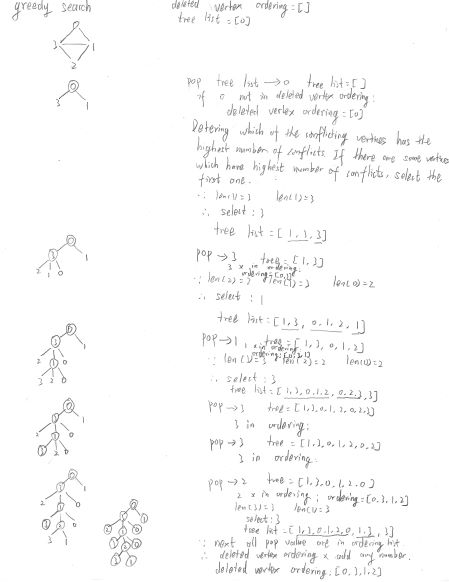

### greedy search coloring:

Step 1. Compute the corresponding degrees for each vertex from the deleted_vertex_ordering list and fill the values into the original_degrees list. Set all the values in the color_options list to False, where the number of False is the number of vertices.

Step 2. Set the color of the first vertex in the deleted_vertex_ordering list to 0. Fill the color value into the position of the vertex in the vertex_colors list.

Step 3. Take the next vertex in the deleted_vertex_ordering list and its corresponding index value in the deleted_vertex_ordering.

Step 4. Detects all vertices that have conflicts with this vertex. If the conflicting vertex already has a color set, set the color as the index value to True for the position corresponding to that index in the color_options list.

Step 5. Detects the index with the earliest False value from the color_options list, and that index value is the value of the vertex color. And fill the color value into the vertex_colors list corresponding to the position of the vertex.

Step 6. If the value in the deleted_vertex_ordering list is not read out, skip to Step 3. If the value in the deleted_vertex_ordering list is read out, skip to Step 7.

Step 7. Each index value and the data value in the vertex_colors list corresponds to the vertex value and the color value of the vertex, respectively.

### Greedy Search Ordering and Coloring Code:

#### Random graph with Uniform distribution:

##### Ordering time:

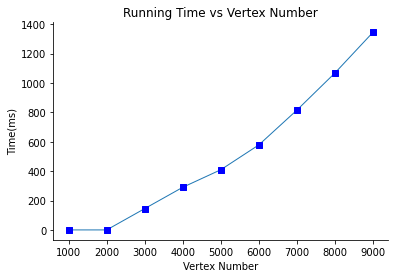

In [70]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 9 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # Greedy search random graph:
        Greedy_search_object = GraphOrderingColaringMethod(new_graph_random)

        # Greedy random graph result:
        result = Greedy_search_object.greedy_search()
        
        x.append(i)
        y.append(round((result[5] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Coloring time:

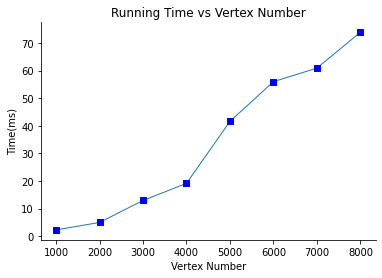

In [71]:
if __name__ == '__main__':
    x = []
    y = []
    range_list = [1000, 8 * 1000 + 1, 1000]
    for i in range(range_list[0], range_list[1], range_list[2]):
        # random graph:
        random_graph = CreateGraph(vertex_number=i, E=i, DIST="Uniform")
        new_graph_random = random_graph.create_graph_random()

        # Greedy search random graph:
        Greedy_search_object = GraphOrderingColaringMethod(new_graph_random)

        # Greedy random graph result:
        result = Greedy_search_object.greedy_search()
        
        x.append(i)
        y.append(round((result[6] * 1000),3))

    chart = Chart(x, y, range_list)
    chart.graph_chart()

The time complexity f(n) is Θ (V^2). The graphs and charts result basically support my complexity analysis for a random graph with Skewed distribution.

##### Example:

In [72]:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()

    # Greedy search random graph:
    Greedy_search_object = GraphOrderingColaringMethod(new_graph_random)

    # Greedy random graph result:
    result = Greedy_search_object.greedy_search()
    print("-----------------------------------------------")
    print(f"vertex colors: {result[1]}\n")
    print(f"original degrees: {result[2]}\n")
    print(f"total number colors: {result[4]}\n")

start note:0-->7-->8-->3-->6-->5

start note:1-->9-->2-->8-->6-->4-->3

start note:2-->1-->9-->4-->5

start note:3-->9-->7-->6-->4-->0-->1-->5-->8

start note:4-->5-->2-->6-->3-->1-->7

start note:5-->8-->4-->7-->9-->2-->6-->3-->0

start note:6-->8-->7-->4-->1-->3-->5-->0

start note:7-->0-->6-->5-->3-->4

start note:8-->5-->6-->9-->1-->0-->3

start note:9-->1-->3-->8-->2-->5

-----------------------------------------------
vertex colors: [0, 0, 1, 1, 4, 2, 3, 5, 4, 3]

original degrees: [5, 8, 8, 7, 6, 6, 6, 5, 4, 5]

total number colors: 6



## Vertex Ordering Capabilities:

### Smallest Last Vertex Ordering:

start note:0-->7-->5-->3-->6-->8

start note:1-->4-->6-->5-->2-->8

start note:2-->7-->3-->4-->8-->1

start note:3-->9-->7-->2-->0-->4-->6-->5

start note:4-->1-->9-->8-->2-->3-->7

start note:5-->0-->6-->7-->1-->3-->8

start note:6-->5-->7-->0-->1-->3-->9

start note:7-->0-->3-->6-->2-->5-->8-->4-->9

start note:8-->9-->4-->2-->0-->7-->1-->5

start note:9-->3-->4-->8-->6-->7

vertex colors:  [0, 0, 1, 3, 2, 2, 1, 4, 3, 0]
deleted vertex ordering:  [9, 6, 1, 2, 4, 3, 5, 8, 7, 0]
original degrees:  [5, 6, 5, 5, 6, 7, 6, 7, 8, 5]
the degree when deleted:  [5, 5, 4, 4, 3, 3, 3, 2, 1, 0]
max deleted degree:  5
terminal cliques:  4
total number colors:  5


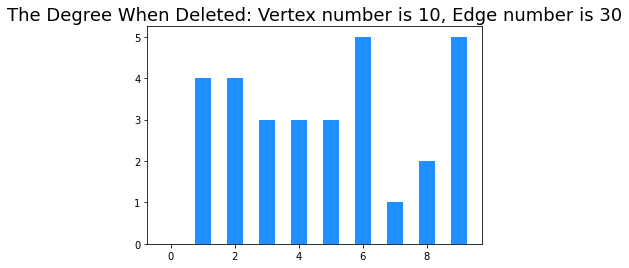

In [73]:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=10, E=30, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    new_graph_random.print_graph_list()
    
    # SLVO random graph:
    SLVO_object = GraphOrderingColaringMethod(new_graph_random)
    
    # SLVO random graph result:
    result = SLVO_object.smallest_last_vertex_ordering()
    
    # SLVO output:
    print("vertex colors: ", result[1])
    print("deleted vertex ordering: ", result[10])
    print("original degrees: ", result[2])
    print("the degree when deleted: ", result[4])
    print("max deleted degree: ", result[5])
    print("terminal cliques: ", result[6])
    print("total number colors: ", result[7])
    
    deleted_vertex_ordering = result[10]
    vertext_index = 0
    degree_when_deleted_histogram = []
    for i in result[4]:
        for j in range(i):
            degree_when_deleted_histogram.append(deleted_vertex_ordering[vertext_index])
        vertext_index += 1
    
    plt.figure("The Degree When Deleted")
    plt.title("The Degree When Deleted: Vertex number is 10, Edge number is 30", fontsize=18)
    plt.hist(x=degree_when_deleted_histogram, bins=range(0,11), color='dodgerblue', histtype="bar", rwidth=0.5, align='left')
    plt.show()

A discussion of how these bound the colors needed:

The Terminal Cliques <= The Max Deleted Degree <= Total Number Colors

### Color numbers in different methods:

#### My Code:

In [74]:
# complete graph
if __name__ == '__main__':
    complete_graph = CreateGraph(vertex_number=100)
    new_graph_complete = complete_graph.create_graph_complete()
    
    # SLVO:
    SLVO_object = GraphOrderingColaringMethod(new_graph_complete)
    SLVO_result = SLVO_object.smallest_last_vertex_ordering()
    print(f"SLVO total number colors: {SLVO_result[7]}")
    
    # SODL:
    SODL_object = GraphOrderingColaringMethod(new_graph_complete)
    SODL_result = SODL_object.smallest_original_degree_last()
    print(f"SODL total number colors: {SODL_result[4]}")
    
    # Uniform random:
    Uniform_random_object = GraphOrderingColaringMethod(new_graph_complete)
    Uniform_random_result = Uniform_random_object.uniform_random_ordering()
    print(f"Uniform random total number colors: {Uniform_random_result[4]}")
    
    # BFS:
    BFS_object = GraphOrderingColaringMethod(new_graph_complete)
    BFS_result = BFS_object.BFS()
    print(f"BFS total number colors: {BFS_result[4]}")
    
    # DFS:
    DFS_object = GraphOrderingColaringMethod(new_graph_complete)
    DFS_result = DFS_object.DFS()
    print(f"DFS total number colors: {DFS_result[4]}")
    
    # Greedy:
    Greedy_search_object = GraphOrderingColaringMethod(new_graph_complete)
    Greedy_search_result = Greedy_search_object.greedy_search()
    print(f"Greedy search total number colors: {Greedy_search_result[4]}")

SLVO total number colors: 100
SODL total number colors: 100
Uniform random total number colors: 100
BFS total number colors: 100
DFS total number colors: 100
Greedy search total number colors: 100


In [75]:
# cycle graph:
if __name__ == '__main__':
    # cycle graph:
    cycle_graph = CreateGraph(vertex_number=100)
    new_graph_cycle = cycle_graph.create_graph_cycle()
    
    # SLVO:
    SLVO_object = GraphOrderingColaringMethod(new_graph_cycle)
    SLVO_result = SLVO_object.smallest_last_vertex_ordering()
    print(f"SLVO total number colors: {SLVO_result[7]}")

    # SODL:
    SODL_object = GraphOrderingColaringMethod(new_graph_cycle)
    SODL_result = SODL_object.smallest_original_degree_last()
    print(f"SODL total number colors: {SODL_result[4]}")

    # Uniform random:
    Uniform_random_object = GraphOrderingColaringMethod(new_graph_cycle)
    Uniform_random_result = Uniform_random_object.uniform_random_ordering()
    print(f"Uniform random total number colors: {Uniform_random_result[4]}")

    # BFS:
    BFS_object = GraphOrderingColaringMethod(new_graph_cycle)
    BFS_result = BFS_object.BFS()
    print(f"BFS total number colors: {BFS_result[4]}")

    # DFS:
    DFS_object = GraphOrderingColaringMethod(new_graph_cycle)
    DFS_result = DFS_object.DFS()
    print(f"DFS total number colors: {DFS_result[4]}")

    # Greedy:
    Greedy_search_object = GraphOrderingColaringMethod(new_graph_cycle)
    Greedy_search_result = Greedy_search_object.greedy_search()
    print(f"Greedy search total number colors: {Greedy_search_result[4]}")

SLVO total number colors: 2
SODL total number colors: 2
Uniform random total number colors: 3
BFS total number colors: 2
DFS total number colors: 2
Greedy search total number colors: 2


In [76]:
# random graph with Uniform distribution:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=100, E=2000, DIST="Uniform")
    new_graph_random = random_graph.create_graph_random()
    
    # SLVO:
    SLVO_object = GraphOrderingColaringMethod(new_graph_random)
    SLVO_result = SLVO_object.smallest_last_vertex_ordering()
    print(f"SLVO total number colors: {SLVO_result[7]}")

    # SODL:
    SODL_object = GraphOrderingColaringMethod(new_graph_random)
    SODL_result = SODL_object.smallest_original_degree_last()
    print(f"SODL total number colors: {SODL_result[4]}")

    # Uniform random:
    Uniform_random_object = GraphOrderingColaringMethod(new_graph_random)
    Uniform_random_result = Uniform_random_object.uniform_random_ordering()
    print(f"Uniform random total number colors: {Uniform_random_result[4]}")

    # BFS:
    BFS_object = GraphOrderingColaringMethod(new_graph_random)
    BFS_result = BFS_object.BFS()
    print(f"BFS total number colors: {BFS_result[4]}")

    # DFS:
    DFS_object = GraphOrderingColaringMethod(new_graph_random)
    DFS_result = DFS_object.DFS()
    print(f"DFS total number colors: {DFS_result[4]}")

    # Greedy:
    Greedy_search_object = GraphOrderingColaringMethod(new_graph_random)
    Greedy_search_result = Greedy_search_object.greedy_search()
    print(f"Greedy search total number colors: {Greedy_search_result[4]}")

SLVO total number colors: 20
SODL total number colors: 19
Uniform random total number colors: 20
BFS total number colors: 19
DFS total number colors: 17
Greedy search total number colors: 15


In [77]:
# random graph with Skewed distribution:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=100, E=2000, DIST="Skewed")
    new_graph_random = random_graph.create_graph_random()
    
    # SLVO:
    SLVO_object = GraphOrderingColaringMethod(new_graph_random)
    SLVO_result = SLVO_object.smallest_last_vertex_ordering()
    print(f"SLVO total number colors: {SLVO_result[7]}")

    # SODL:
    SODL_object = GraphOrderingColaringMethod(new_graph_random)
    SODL_result = SODL_object.smallest_original_degree_last()
    print(f"SODL total number colors: {SODL_result[4]}")

    # Uniform random:
    Uniform_random_object = GraphOrderingColaringMethod(new_graph_random)
    Uniform_random_result = Uniform_random_object.uniform_random_ordering()
    print(f"Uniform random total number colors: {Uniform_random_result[4]}")

    # BFS:
    BFS_object = GraphOrderingColaringMethod(new_graph_random)
    BFS_result = BFS_object.BFS()
    print(f"BFS total number colors: {BFS_result[4]}")

    # DFS:
    DFS_object = GraphOrderingColaringMethod(new_graph_random)
    DFS_result = DFS_object.DFS()
    print(f"DFS total number colors: {DFS_result[4]}")

    # Greedy:
    Greedy_search_object = GraphOrderingColaringMethod(new_graph_random)
    Greedy_search_result = Greedy_search_object.greedy_search()
    print(f"Greedy search total number colors: {Greedy_search_result[4]}")

SLVO total number colors: 28
SODL total number colors: 27
Uniform random total number colors: 26
BFS total number colors: 22
DFS total number colors: 23
Greedy search total number colors: 20


In [78]:
# random graph with Gaussian distribution:
if __name__ == '__main__':
    # random graph:
    random_graph = CreateGraph(vertex_number=100, E=2000, DIST="Gaussian")
    new_graph_random = random_graph.create_graph_random()
    
    # SLVO:
    SLVO_object = GraphOrderingColaringMethod(new_graph_random)
    SLVO_result = SLVO_object.smallest_last_vertex_ordering()
    print(f"SLVO total number colors: {SLVO_result[7]}")

    # SODL:
    SODL_object = GraphOrderingColaringMethod(new_graph_random)
    SODL_result = SODL_object.smallest_original_degree_last()
    print(f"SODL total number colors: {SODL_result[4]}")

    # Uniform random:
    Uniform_random_object = GraphOrderingColaringMethod(new_graph_random)
    Uniform_random_result = Uniform_random_object.uniform_random_ordering()
    print(f"Uniform random total number colors: {Uniform_random_result[4]}")

    # BFS:
    BFS_object = GraphOrderingColaringMethod(new_graph_random)
    BFS_result = BFS_object.BFS()
    print(f"BFS total number colors: {BFS_result[4]}")

    # DFS:
    DFS_object = GraphOrderingColaringMethod(new_graph_random)
    DFS_result = DFS_object.DFS()
    print(f"DFS total number colors: {DFS_result[4]}")

    # Greedy:
    Greedy_search_object = GraphOrderingColaringMethod(new_graph_random)
    Greedy_search_result = Greedy_search_object.greedy_search()
    print(f"Greedy search total number colors: {Greedy_search_result[4]}")

SLVO total number colors: 23
SODL total number colors: 20
Uniform random total number colors: 19
BFS total number colors: 18
DFS total number colors: 18
Greedy search total number colors: 17


#### Table:

| Graph    | Vertex | Edge | Smallest Last Vertex Ordering | Smallest Original Degree Last | Uniform Random Ordering | BFS  | DFS  | Greedy Search |
| -------- | ------ | ---- | ----------------------------- | ----------------------------- | ----------------------- | ---- | ---- | ------------- |
| Complete | 100    |      | 100                           | 100                           | 100                     | 100  | 100  | 100           |
| Cycle    | 100    |      | 2                             | 2                             | 3                       | 2    | 2    | 2             |
| Uniform  | 100    | 2000 | 20                            | 19                            | 20                      | 19   | 17   | 15            |
| Skewed   | 100    | 2000 | 28                            | 27                            | 26                      | 22   | 23   | 20            |
| Gaussian | 100    | 2000 | 23                            | 20                            | 19                      | 18   | 18   | 17            |

According to the table, it is easy to see that the greedy search is able to produce the least number of colors. Because in greedy search, each time the vertices corresponding to the maximum number of conflicts are read, it can have the ordering list required for the minimum number of colors.